# EDA (Exploratory Data Analysis) #

The data comes from a müsli company (fictional) and they have provided me with an excel file with different sheets and data points.

The goal with this project is to understand the delivery process of a müsli company. In concrete, how long it takes for a order to be processed: from order day until ready to ship. The current information is that it takes 2 days for this metric and I will check if this fits the actual data. 

I will be performing data cleaning, function definition, merging of dataframes, and visualisation.

Setting up the environment

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Step 1: Reading the file

I checked all sheets and decided that for this metric I needed two of them, being: df_order_process_data and df_intern_data_study. I created dataframes from each.

In [2]:
df_order_process_data = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name=2, header=0)
df_order_process_data.head(1)

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express


In [3]:
df_intern_data_study = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name=3, header=0)
df_intern_data_study.head(3)

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04


# Step 2: Cleaning dataframes:

I will create a function to help with cleaning

In [5]:
def name_cleaning_function(df):
    """Transforms column names of input DataFrame with lower_snake_case.

    Args:
      df: Any DataFrame.

    Returns:
      None.

    Prints:
      First two rows of changed DataFrame
    """
    col_names = df.copy().columns
    col_names = col_names.str.lower().str.replace(" ", "_")
    df.columns = col_names
    print(df.head(2))
    return

In [6]:
name_cleaning_function(df_order_process_data)

   row_id        order_id order_date on_truck_scan_date            ship_mode
0    3074  CA-2019-125206 2019-01-03         2019-01-07              Express
1    4919  CA-2019-160304 2019-01-02         2019-01-09  Standard Processing


In [7]:
name_cleaning_function(df_intern_data_study)

         order_id ready_to_ship_date pickup_date
0  CA-2019-116540         2019-09-02  2019-09-03
1  CA-2019-116540         2019-09-02  2019-09-03


Here I selected the columns I did not need for this metric and dropped them:

In [8]:
df_order_process_data.drop('row_id', axis=1, inplace=True)


In [9]:
df_order_process_data.head(3)

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [10]:
df_intern_data_study.drop('pickup_date', axis=1, inplace=True)
df_intern_data_study.head(3)

,order_id,ready_to_ship_date
0,CA-2019-116540,2019-09-02
1,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04


At this point we are ready to drop duplicates. 

The function will help identify them:

In [11]:
def dupli_function(df):
    """Searches for duplicate rows and prints information about them.

    Args:
      df: A DataFrame containing "order_id" in one column.

    Returns:
      DataFrame of all duplicate values.

    Prints:
      Number of Duplicates.
      Number of Unique order_ids among Duplicates.
    """
    dupli_mask = df.duplicated(keep = False)

    new_df = df.copy()[dupli_mask]

    print("---- Original Number of Order-IDs -----")
    print(len(df["order_id"]))
    print("---- Number of Unique order ID's in Original DataFrame -----")
    print(df["order_id"].nunique())
    print("---- Number of Duplicates -----")
    print(len(df[dupli_mask]))
    print("---- Number of Unique order ID's among duplicates -----")
    print(new_df["order_id"].nunique())
    return new_df

In [12]:
dupli_function(df_order_process_data)

---- Original Number of Order-IDs -----
5899
---- Number of Unique order ID's in Original DataFrame -----
3002
---- Number of Duplicates -----
4339
---- Number of Unique order ID's among duplicates -----
1443


,order_id,order_date,on_truck_scan_date,ship_mode
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
5,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...
5893,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5894,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [13]:
dupli_function(df_intern_data_study)

---- Original Number of Order-IDs -----
290
---- Number of Unique order ID's in Original DataFrame -----
204
---- Number of Duplicates -----
147
---- Number of Unique order ID's among duplicates -----
61


,order_id,ready_to_ship_date
0,CA-2019-116540,2019-09-02
1,CA-2019-116540,2019-09-02
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
6,CA-2019-106278,2019-09-05
...,...,...
282,CA-2020-107125,2020-12-02
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
286,CA-2020-105333,2020-12-04


We drop them now.

In [14]:
df_order_process_data.drop_duplicates(keep='first', inplace=True)

In [15]:
df_order_process_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3003 entries, 0 to 5898
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3003 non-null   object        
 1   order_date          3003 non-null   datetime64[ns]
 2   on_truck_scan_date  3003 non-null   datetime64[ns]
 3   ship_mode           3003 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 117.3+ KB


In [16]:
df_intern_data_study.drop_duplicates(keep='first', inplace=True)
df_intern_data_study.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


# Step 3: Merging

Let's merge! We proceeded with an inner join on order_id (column in common -key) and called the new dataframe df_pt (processing time=metric):

In [17]:
df_pt = pd.merge(df_order_process_data, df_intern_data_study, on='order_id')
df_pt

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02
1,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04
2,CA-2019-129630,2019-09-04,2019-09-04,Express,2019-09-04
3,CA-2019-158099,2019-09-03,2019-09-06,Express,2019-09-05
4,CA-2019-132143,2019-09-03,2019-09-06,Express,2019-09-05
...,...,...,...,...,...
199,CA-2020-159506,2020-11-27,2020-12-04,Standard Processing,2020-12-02
200,US-2020-110576,2020-11-28,2020-12-07,Standard Processing,2020-12-04
201,CA-2020-119305,2020-11-30,2020-12-07,Standard Processing,2020-12-04
202,CA-2020-105333,2020-11-30,2020-12-07,Standard Processing,2020-12-04


# Step 4: Calculating Processing time 

In order to calculate the processing time per order, we subtracted two dates: Order Date and Ready to Ship:

In [18]:
df_pt['processing_time'] = (df_pt['ready_to_ship_date'] - df_pt['order_date'])
df_pt

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,processing_time
0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,0 days
1,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04,2 days
2,CA-2019-129630,2019-09-04,2019-09-04,Express,2019-09-04,0 days
3,CA-2019-158099,2019-09-03,2019-09-06,Express,2019-09-05,2 days
4,CA-2019-132143,2019-09-03,2019-09-06,Express,2019-09-05,2 days
...,...,...,...,...,...,...
199,CA-2020-159506,2020-11-27,2020-12-04,Standard Processing,2020-12-02,5 days
200,US-2020-110576,2020-11-28,2020-12-07,Standard Processing,2020-12-04,6 days
201,CA-2020-119305,2020-11-30,2020-12-07,Standard Processing,2020-12-04,4 days
202,CA-2020-105333,2020-11-30,2020-12-07,Standard Processing,2020-12-04,4 days


Let's calculate the average processing time:

In [19]:
df_pt[['processing_time']].describe()

,processing_time
count,204
mean,4 days 04:14:07.058823529
std,1 days 23:16:29.025426269
min,0 days 00:00:00
25%,3 days 00:00:00
50%,4 days 00:00:00
75%,6 days 00:00:00
max,8 days 00:00:00


And the average of processing time is 4 days and 4 hours.

The expected processing time was 2 days. However, the avg of 204 orders is more than 4 days. I will now check if the day the order was placed had any impact on this metric.

In [20]:
# First, I need the day of the week of order placement:
df_pt['order_day'] = df_pt['order_date'].dt.day_name()

In [21]:
# Furthermore, I need the day of the week when order is ready to ship:
df_pt['ready_to_ship_day'] = df_pt['ready_to_ship_date'].dt.day_name()
df_pt.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,processing_time,order_day,ready_to_ship_day
0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,0 days,Monday,Monday
1,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04,2 days,Monday,Wednesday
2,CA-2019-129630,2019-09-04,2019-09-04,Express,2019-09-04,0 days,Wednesday,Wednesday
3,CA-2019-158099,2019-09-03,2019-09-06,Express,2019-09-05,2 days,Tuesday,Thursday
4,CA-2019-132143,2019-09-03,2019-09-06,Express,2019-09-05,2 days,Tuesday,Thursday


Checking now the avg of processing days based on order placement day.

In [22]:
df_pt.groupby("order_day")["processing_time"].describe()

,count,mean,std,min,25%,50%,75%,max
order_day,,,,,,,,
Friday,37,4 days 12:58:22.702702702,1 days 11:08:34.624728804,0 days 00:00:00,4 days 00:00:00,5 days 00:00:00,5 days 00:00:00,7 days 00:00:00
Monday,35,3 days 18:30:51.428571428,2 days 03:45:53.821235507,0 days 00:00:00,3 days 00:00:00,4 days 00:00:00,4 days 00:00:00,7 days 00:00:00
Saturday,13,4 days 00:00:00,1 days 22:59:21.697792378,2 days 00:00:00,2 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00
Sunday,3,6 days 16:00:00,2 days 07:25:32.253031934,4 days 00:00:00,6 days 00:00:00,8 days 00:00:00,8 days 00:00:00,8 days 00:00:00
Thursday,31,3 days 20:54:11.612903225,1 days 10:54:45.395255953,0 days 00:00:00,4 days 00:00:00,4 days 00:00:00,4 days 12:00:00,6 days 00:00:00
Tuesday,48,4 days 07:30:00,2 days 09:33:23.877397385,0 days 00:00:00,2 days 00:00:00,6 days 00:00:00,6 days 00:00:00,7 days 00:00:00
Wednesday,37,4 days 03:14:35.675675675,1 days 21:18:43.670544442,0 days 00:00:00,5 days 00:00:00,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00


Now let's look into shipping mode and if it has any impact as well:

In [23]:
df_pt.groupby("ship_mode")["processing_time"].describe()

,count,mean,std,min,25%,50%,75%,max
ship_mode,,,,,,,,
Express,53,2 days 00:54:20.377358490,1 days 16:28:44.363545098,0 days 00:00:00,0 days 00:00:00,2 days 00:00:00,3 days 00:00:00,5 days 00:00:00
Standard Processing,151,4 days 22:15:05.960264900,1 days 10:37:27.519687470,2 days 00:00:00,4 days 00:00:00,5 days 00:00:00,6 days 00:00:00,8 days 00:00:00


This means that 74% of orders (sample) have taken almost 5 processing days if standard shipping mode. Only 26% matched the expected 2 processing days BUT with Express shipping, which is extra-charge. 

In [24]:
print(f"-------------------- DF=PT: Avg processing time ---------------------- ")
display(df_pt[['processing_time']].describe())
print(f"-------------------- DF=PT: Placed Order Weekday by Processing Time ---------------------- ")
display(df_pt.groupby("order_day")["processing_time"].describe().sort_values(by="mean"))
print(f"-------------------- DF=PT: Ship Mode vs Processing Time ---------------------- ")
display(df_pt.groupby("ship_mode")["processing_time"].describe())

-------------------- DF=PT: Avg processing time ---------------------- 


,processing_time
count,204
mean,4 days 04:14:07.058823529
std,1 days 23:16:29.025426269
min,0 days 00:00:00
25%,3 days 00:00:00
50%,4 days 00:00:00
75%,6 days 00:00:00
max,8 days 00:00:00


-------------------- DF=PT: Placed Order Weekday by Processing Time ---------------------- 


,count,mean,std,min,25%,50%,75%,max
order_day,,,,,,,,
Monday,35,3 days 18:30:51.428571428,2 days 03:45:53.821235507,0 days 00:00:00,3 days 00:00:00,4 days 00:00:00,4 days 00:00:00,7 days 00:00:00
Thursday,31,3 days 20:54:11.612903225,1 days 10:54:45.395255953,0 days 00:00:00,4 days 00:00:00,4 days 00:00:00,4 days 12:00:00,6 days 00:00:00
Saturday,13,4 days 00:00:00,1 days 22:59:21.697792378,2 days 00:00:00,2 days 00:00:00,5 days 00:00:00,6 days 00:00:00,6 days 00:00:00
Wednesday,37,4 days 03:14:35.675675675,1 days 21:18:43.670544442,0 days 00:00:00,5 days 00:00:00,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00
Tuesday,48,4 days 07:30:00,2 days 09:33:23.877397385,0 days 00:00:00,2 days 00:00:00,6 days 00:00:00,6 days 00:00:00,7 days 00:00:00
Friday,37,4 days 12:58:22.702702702,1 days 11:08:34.624728804,0 days 00:00:00,4 days 00:00:00,5 days 00:00:00,5 days 00:00:00,7 days 00:00:00
Sunday,3,6 days 16:00:00,2 days 07:25:32.253031934,4 days 00:00:00,6 days 00:00:00,8 days 00:00:00,8 days 00:00:00,8 days 00:00:00


-------------------- DF=PT: Ship Mode vs Processing Time ---------------------- 


,count,mean,std,min,25%,50%,75%,max
ship_mode,,,,,,,,
Express,53,2 days 00:54:20.377358490,1 days 16:28:44.363545098,0 days 00:00:00,0 days 00:00:00,2 days 00:00:00,3 days 00:00:00,5 days 00:00:00
Standard Processing,151,4 days 22:15:05.960264900,1 days 10:37:27.519687470,2 days 00:00:00,4 days 00:00:00,5 days 00:00:00,6 days 00:00:00,8 days 00:00:00


# Step 5: Visualisation


To start our visualization, let's change the datatype of column processing_time to int:

In [25]:
df_pt["processing_time"] = df_pt["processing_time"].dt.days

In [26]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   order_date          204 non-null    datetime64[ns]
 2   on_truck_scan_date  204 non-null    datetime64[ns]
 3   ship_mode           204 non-null    object        
 4   ready_to_ship_date  204 non-null    datetime64[ns]
 5   processing_time     204 non-null    int64         
 6   order_day           204 non-null    object        
 7   ready_to_ship_day   204 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 12.9+ KB


In [27]:
df_pt.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,processing_time,order_day,ready_to_ship_day
0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,0,Monday,Monday
1,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04,2,Monday,Wednesday
2,CA-2019-129630,2019-09-04,2019-09-04,Express,2019-09-04,0,Wednesday,Wednesday
3,CA-2019-158099,2019-09-03,2019-09-06,Express,2019-09-05,2,Tuesday,Thursday
4,CA-2019-132143,2019-09-03,2019-09-06,Express,2019-09-05,2,Tuesday,Thursday


Set the name of the weekdays:

In [28]:
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_pt["order_day"] = pd.Categorical(df_pt["order_day"], categories=order_days, ordered=True)

In [29]:
#setting a style
plt.style.use('seaborn-v0_8-pastel') 

Here the plot will only take into account the order day and the processing time:

''

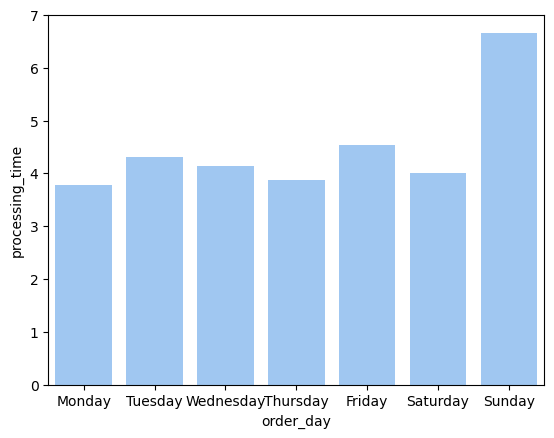

In [30]:
g = sns.barplot(data=df_pt, x = "order_day", y="processing_time", errorbar=None)
g.figure.patch.set_facecolor('white') 
;

Since the shipping mode does play a big factor, let's capture this:

In [31]:
#define colours
palette = {"Express": "#db6161",
           "Standard Processing": "#75b855",
           }

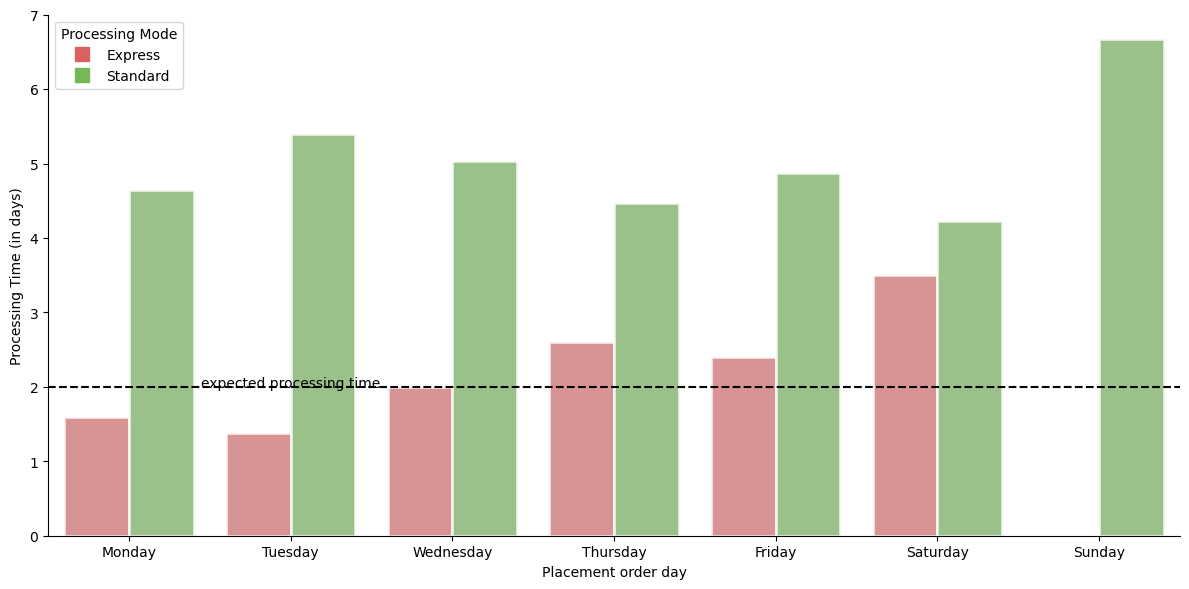

In [32]:
g = sns.catplot(
    data=df_pt,
    x="order_day",  
    y="processing_time",  
    hue="ship_mode",  
    kind="bar",  
    height=6,  
    aspect=2,
    errorbar=None,
    legend=False,
    palette=palette,
    alpha=.75 #set saturation
    
)
g.figure.patch.set_facecolor('white') #sets edge colour to white
plt.axhline(2, color="black", linestyle="--") #it marks the expected processing time
plt.annotate("expected processing time", xy=("Tuesday", 2), color="black", horizontalalignment="center")

#naming the axis and plot
plt.xlabel("Placement order day")
plt.ylabel("Processing Time (in days)")
#plt.title("N° of processing days by day of the week")

#customising the legend
express_handle = mlines.Line2D([], [], color='#db6161', marker='s', markersize=10, linestyle='None', label='Express')
standard_handle = mlines.Line2D([], [], color='#75b855', marker='s', markersize=10, linestyle='None', label='Standard')
plt.legend(handles=[express_handle, standard_handle], title='Processing Mode', loc='upper left')

#set white outline for the bars
for ax in g.axes.flat:  # Loop through all axes (for facet grids)
    for patch in ax.patches:
        patch.set_edgecolor('white')  # Set the edge color
        patch.set_linewidth(2) 

plt.show()


In the above image we see that the shipping mode does play a huge role in processing days. The dotted line sets the expected processing days (2). Only orders placed on Monday, Tuesday and Wednesday fulfill this expectation (with Express mode). 

In [33]:
# set colour for match/mismatch

match_mask = df_pt["processing_time"] == 2
df_pt["processing_time_match"] = match_mask

df_pt["processing_time_match_triple"] = pd.cut(df_pt["processing_time"], bins=[0,3,4,8], include_lowest=True, right=False,
                                             labels=["better", "expected", "worse"])

# define colors
palette_2 = {"better": "#2f7030",
           "expected": "#a7b838",
           "worse": "#db0401"}

palette_3 = {"better": "#75b855",
           "expected": "#db0401",
           "worse": "#db0401"}

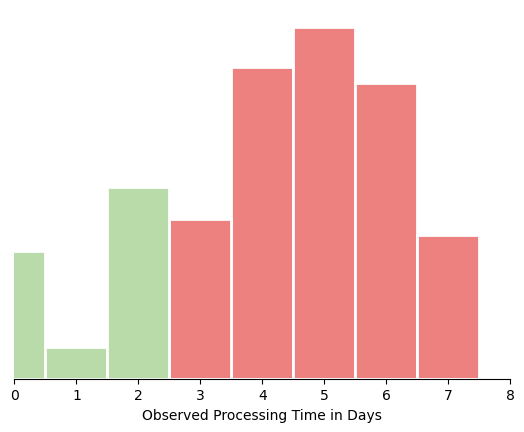

In [35]:
# set figure background
fig = plt.figure()
fig.patch.set_facecolor("white")

sns.histplot(data = df_pt,x = "processing_time", discrete=True, stat = "percent",
             hue="processing_time_match_triple", palette=palette_3,legend=False,
             edgecolor="white", linewidth =2, alpha=0.5);

# remove axes
sns.despine(left=True, bottom=False)
ax = plt.gca();
ax.set_yticks([]);

# background transparent
ax.figure.patch.set_facecolor("white")
ax.set_facecolor((0, 0, 0, 0))

#limit the x axis
ax.set_xlim(0, 8)

# annotations
counted_processing_days = df_pt["processing_time"].value_counts().sort_index()
counted_processing_days = round((counted_processing_days / counted_processing_days.sum())*100, 0).astype(int)


# labels
plt.ylabel(None);
plt.xlabel("Observed Processing Time in Days");


In this second plot, we see that only 20% of orders take 2 days of processing. The rest, 80%, take longer than that, being the 5 processing days at a 22% of orders.

After this EDA, the data suggests that the actual processing time is not 2 days, but a minimum of 4 days. However, taking a closer look into the shipping mode, order with an standard shipping mode are taking longer to be delivered, up to 5 days.